In [10]:
# Importing Library
from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

In [11]:
# Only the data analyst job in united states.
df_US_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop all the Nan value in the salary_year_avg column.
df_US_DA = df_US_DA.dropna(subset='salary_year_avg')

# Call the dataframe
df_US_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


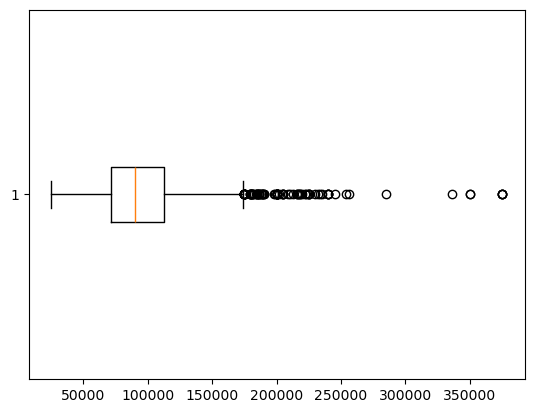

In [ ]:
# Using the matplotlib, plot a box plot of the above data.
plt.boxplot(df_US_DA['salary_year_avg'], vert=False)
plt.show()

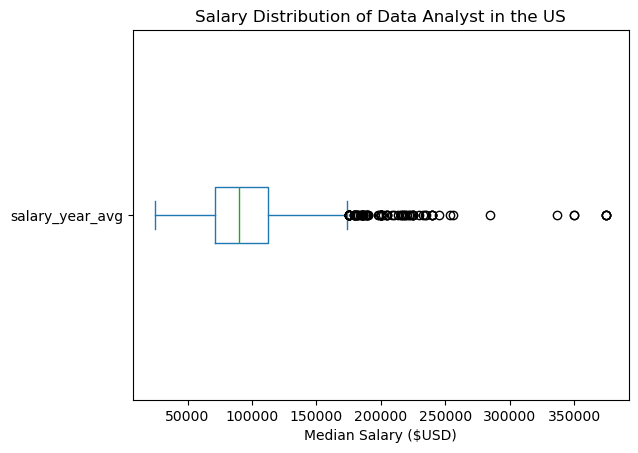

In [13]:
# Using the pandas, plot a box plot of the above data.
df_US_DA['salary_year_avg'].plot(kind='box', vert=False)
plt.title("Salary Distribution of Data Analyst in the US")
plt.xlabel("Median Salary ($USD)")
plt.show()

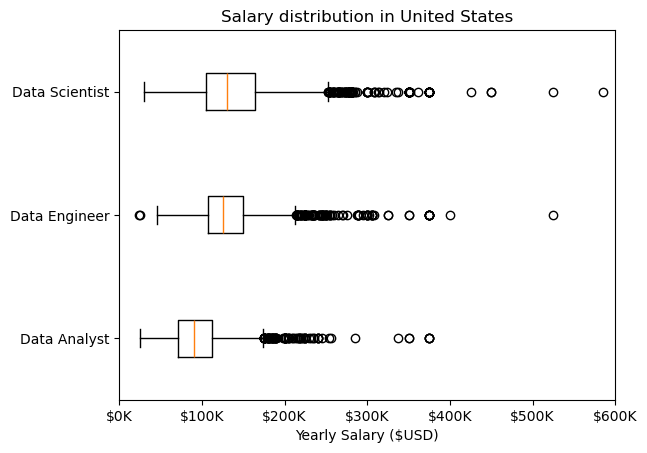

In [30]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin (job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary distribution in United States")
plt.xlabel("Yearly Salary ($USD)")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0, 600000)
plt.show()

# Practise Questions

In [31]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

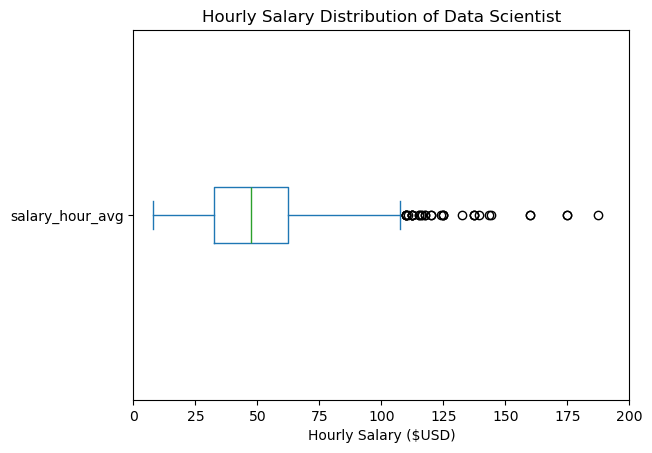

In [41]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

df_DS = df_DS.dropna(subset=['salary_hour_avg'])

df_DS['salary_hour_avg'].plot(kind='box', vert=False)
plt.title("Hourly Salary Distribution of Data Scientist")
plt.xlabel("Hourly Salary ($USD)")
plt.xlim(0, 200)
plt.show()

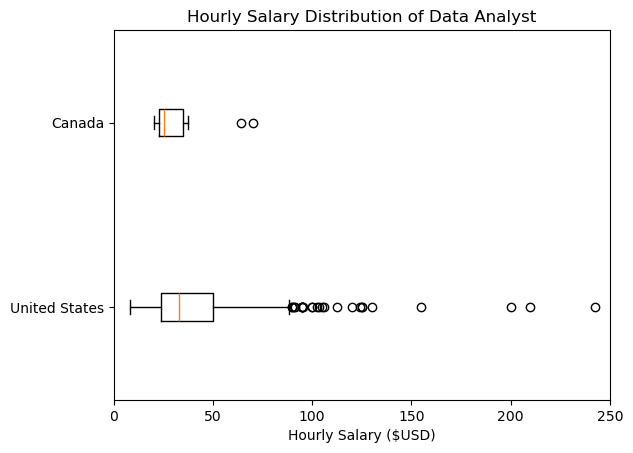

In [47]:
countries = ['United States', 'Canada']

df_country = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')]

df_country = df_country.dropna(subset=['salary_hour_avg'])

job_list = [df_country[df_country['job_country'] == country]['salary_hour_avg']for country in countries]

plt.boxplot(job_list, labels=countries, vert=False)
plt.title("Hourly Salary Distribution of Data Analyst")
plt.xlabel("Hourly Salary ($USD)")
plt.xlim(0, 250)
plt.show()

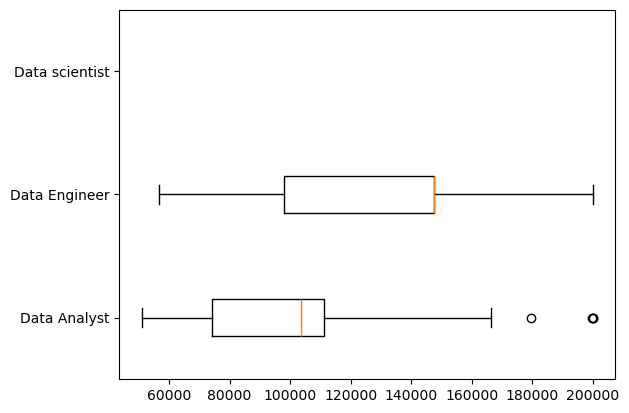

In [64]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data scientist']

df_ger = df[(df['job_country'] == 'Germany') & (df['job_title_short'].isin(job_titles))]

df_ger = df_ger.dropna(subset=['salary_year_avg'])

job_list = [df_ger[df_ger['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.show()

# AI Generated Questions

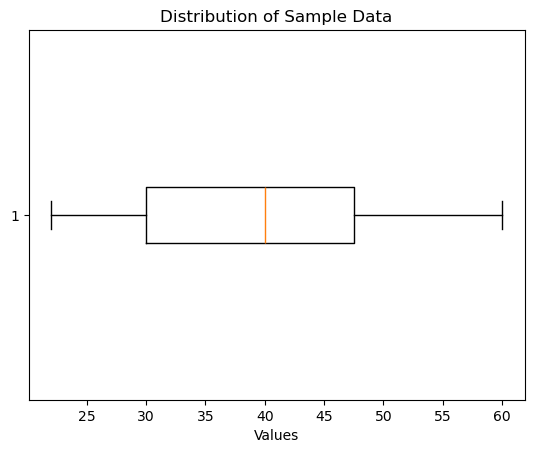

In [71]:
data = [22, 25, 30, 30, 35, 40, 42, 45, 50, 55, 60]

plt.boxplot(data, vert=False)
plt.title('Distribution of Sample Data')
plt.xlabel("Values")
plt.ylabel("")
plt.show()

In [72]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

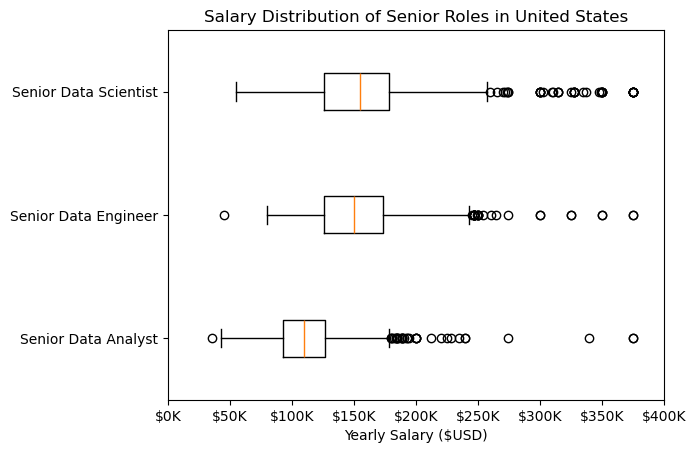

In [79]:
# Create a box plot to display the distribution of a dataset that contains 
# the average yearly salaries of software engineers, product managers, and UX designers in the United States. 
# Assume the data is loaded into a DataFrame called df with columns job_title and salary_year_avg.

job_titles = ['Senior Data Analyst', 'Senior Data Engineer', 'Senior Data Scientist']

df_US = df[(df['job_title_short'] .isin(job_titles)) & (df['job_country'] == 'United States')]

df_US = df_US.dropna(subset=['salary_year_avg'])

salary_stats = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(salary_stats, labels=job_titles, vert=False)
plt.title("Salary Distribution of Senior Roles in United States")
plt.xlabel("Yearly Salary ($USD)")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0, 400000)
plt.show()